# Assignment 3
## 

Use AlexNet and write report about it.

Data: Cat & Dog

You should use keras library to classify cat and dog. 

In [1]:
from mat4py import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, array_to_img


In [2]:
# Load data
data = loadmat('CatDog.mat')
data

{'X': [[-1.847107438016522,
   -43.84710743801652,
   -68.84710743801652,
   -17.847107438016522,
   116.15289256198348,
   -4.847107438016522,
   117.15289256198348,
   67.15289256198348,
   29.152892561983478,
   -74.84710743801652,
   1.152892561983478,
   -82.84710743801652,
   -100.84710743801652,
   -28.847107438016522,
   148.1528925619835,
   147.1528925619835,
   2.152892561983478,
   -39.84710743801652,
   30.152892561983478,
   -51.84710743801652,
   -70.84710743801652,
   -66.84710743801652,
   66.15289256198348,
   -3.847107438016522,
   8.152892561983478,
   -64.84710743801652,
   -53.84710743801652,
   -3.847107438016522,
   126.15289256198348,
   -101.84710743801652,
   -0.847107438016522,
   -97.84710743801652,
   88.15289256198348,
   -59.84710743801652,
   70.15289256198348,
   -83.84710743801652,
   -72.84710743801652,
   47.15289256198348,
   53.15289256198348,
   47.15289256198348,
   -50.84710743801652,
   -90.84710743801652,
   -8.847107438016522,
   148.1528925

In [3]:
# available in the loaded data
print(data.keys())

dict_keys(['X', 'G', 'nx', 'ny'])


In [4]:
X_length = len(data['X'])
print("length of X:", X_length)
G_length = len(data['G'])
print("length of G:", G_length)


length of X: 4096
length of G: 242


In [5]:
import matplotlib.pyplot as plt

# Assuming X is already loaded and preprocessed

# Reshape the first entry in X to visualize as an image
image = X[0].reshape(64, 64)

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


NameError: name 'X' is not defined

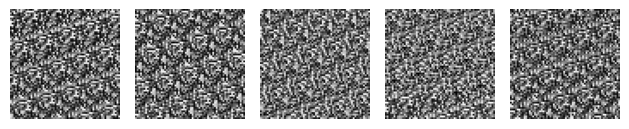

In [8]:
from mat4py import loadmat
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = loadmat('CatDog.mat')

# Convert lists to numpy arrays
X = np.array(data['X'])
y = np.array(data['G'])

# Normalize the data if needed
X = (X - np.mean(X)) / np.std(X)

# Reshape X to fit the image format (assuming grayscale images)
X = X.reshape(-1, 64, 64)

# Plot the images
num_plots = 5  # Change this number to visualize more or fewer images
image_size = 64

for i in range(num_plots):
    plt.subplot(1, num_plots, i + 1)
    plt.imshow(X[i], cmap='gray')  # Display grayscale image
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

In [5]:
# Reshape X to represent images
X_reshaped = np.array(data['X']).reshape(-1, 64, 64, 1)  # Assuming the images are grayscale


In [6]:
# Convert labels to numpy array
y = np.array(data['G'])

In [10]:
y.value_counts().plot.bar()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the modified AlexNet model architecture
model = Sequential()

# Convolutional layers
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer, binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy[1])





Epoch 1/10


2/2 [==============================] - 5s 1s/step - loss: 1.0570 - accuracy: 0.4913 - val_loss: 0.7035 - val_accuracy: 0.5500
Epoch 2/10
2/2 [==============================] - 1s 576ms/step - loss: 0.7316 - accuracy: 0.4855 - val_loss: 0.6892 - val_accuracy: 0.5500
Epoch 3/10
2/2 [==============================] - 1s 585ms/step - loss: 0.6950 - accuracy: 0.4855 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 1s 565ms/step - loss: 0.6940 - accuracy: 0.4798 - val_loss: 0.6950 - val_accuracy: 0.4500
Epoch 5/10
2/2 [==============================] - 1s 571ms/step - loss: 0.6937 - accuracy: 0.5145 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 6/10
2/2 [==============================] - 1s 546ms/step - loss: 0.6925 - accuracy: 0.5434 - val_loss: 0.6934 - val_accuracy: 0.4500
Epoch 7/10
2/2 [==============================] - 1s 535ms/step - loss: 0.6935 - accuracy: 0.5029 - val_loss: 0.6991 - val_accuracy: 0.4500
Epoch 8/10
2/2 [==

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest')

# Normalizing the data
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Fit the augmentation on the training data
datagen.fit(X_train_normalized)

# Training the model with augmented data
history = model.fit(datagen.flow(X_train_normalized, y_train, batch_size=128),
                    epochs=10, validation_data=(X_test_normalized, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_normalized, y_test)
print("Test Accuracy:", accuracy[1])


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (193, 64, 64)